In [1]:
library(Seurat)
library(tidyverse)
source("/shareb//zliu//analysis/hires_gastrulation/CHARMtools/Rlibs/plotFun.R")
library(ComplexHeatmap)
library(circlize)
library(ggpubr)

Registered S3 method overwritten by 'spatstat.geom':
  method     from
  print.boxx cli 

Attaching SeuratObject

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: grid

ComplexHeatm

In [2]:
hires <- readRDS("../../plotadj/hires_validation.rds")

In [3]:
hires[[]] %>% names()

[1] "cellname"           "orig.ident"         "nCount_RNA"        
 [4] "nFeature_RNA"       "Rawreads"           "DNAreads"          
 [7] "RNAreads"           "yperx"              "raw_pairs"         
[10] "pairs_dedup"        "pairs_clean1"       "pairs_clean2"      
[13] "pairs_clean3"       "inter_pairs_clean3" "UMIs_gene"         
[16] "genes_gene"         "UMIs_exon"          "genes_exon"        
[19] "1m"                 "20k"                "50k"               
[22] "RNAreadsRatio"      "pairsPerRead"       "pairsValidRatio"   
[25] "interPairsRatio"    "pairs"              "pre_meta_score"    
[28] "order_index"        "near_p"             "mitotic_p"         
[31] "farAvg"             "NaganoCellcycle"    "repli_score"       
[34] "annote_ratio"       "percent.mt"         "nCount_SCT"        
[37] "nFeature_SCT"       "SCT_snn_res.1"      "seurat_clusters"   
[40] "mouse"              "batch"              "id"                
[43] "mouse_id"           "celltype"           "nCount_scab"       
[46] "nFeature_scab"      "sch.nn_res.0.8"     "nCount_cpggene"    
[49] "nFeature_cpggene"   "clusterEx1_1"       "clusterEx2_1"      
[52] "clusterIn1_1"       "clusterAst_1"       "clusterOli_1"      
[55] "clusterIn2_1"       "clusterEx3_1"

In [4]:
hires

An object of class Seurat 
121333 features across 399 samples within 4 assays 
Active assay: SCT (28026 features, 3000 variable features)
 3 other assays present: RNA, scab, cpggene
 7 dimensional reductions calculated: pca, umap, scabpca, scabtsne, scabumap, schicluster, schiclusterumap

In [5]:
hires@meta.data <- hires@meta.data %>% mutate(batch = str_extract(cellname, "Val[ab]")) %>% mutate(id = as.numeric(str_extract(cellname,"(?<=8w)[0-9]+"))) %>% 
mutate(mouse_id = ifelse(id <= 3016 | (id <= 4064 & id >= 4001),"Mouse 1",
       ifelse((id <= 3032 & id >= 3017) | (id <= 4128 & id >= 4065), "Mouse 2","Mouse 3"))) %>% 
    mutate(mouse_id = ifelse(batch == "Valb" & (id <= 1040 | (id > 1048 & id <= 1144)),"Mouse 3",ifelse(batch == "Valb","Mouse 1",mouse_id)))

In [6]:
options(repr.plot.width = 2,repr.plot.height=2,repr.plot.res=300)
a <- hires[[]] %>% ggviolin(x="mouse_id",y="pairs_dedup",fill="mouse_id",outlier.shape = NA) + theme_Publication() +
    NoLegend() + xlab("")+ ylab("Total contacts")
b <- hires[[]] %>% ggviolin(x="mouse_id",y="UMIs_gene",fill="mouse_id",outlier.shape = NA) + 
    theme_Publication() + NoLegend()+ xlab("")+ ylab("UMIs detected")
c <-hires[[]] %>% ggviolin(x="mouse_id",y="genes_gene",fill="mouse_id",outlier.shape = NA) + 
    theme_Publication()+ NoLegend()+ xlab("")+ ylab("Genes detected")

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


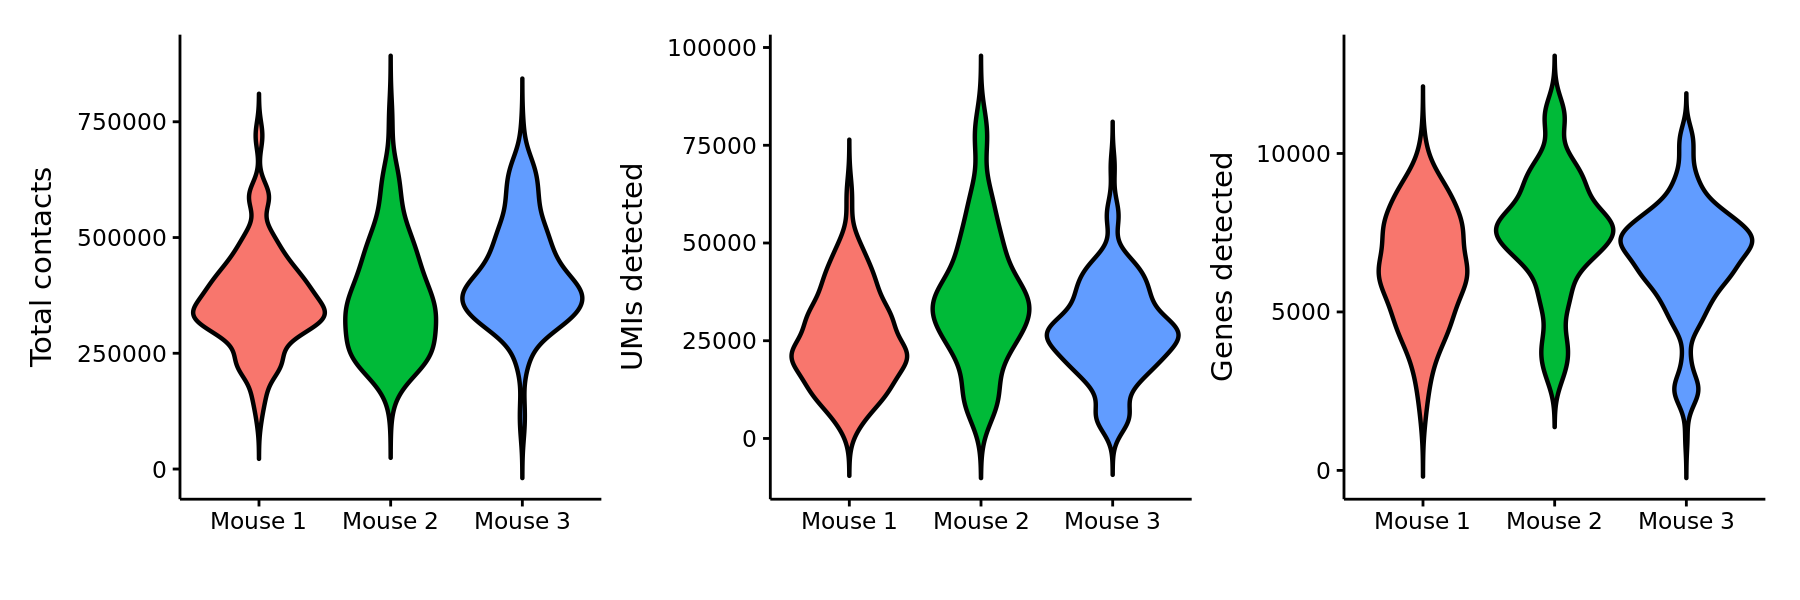

In [7]:
options(repr.plot.width = 6,repr.plot.height=2,repr.plot.res=300)
a | b | c

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


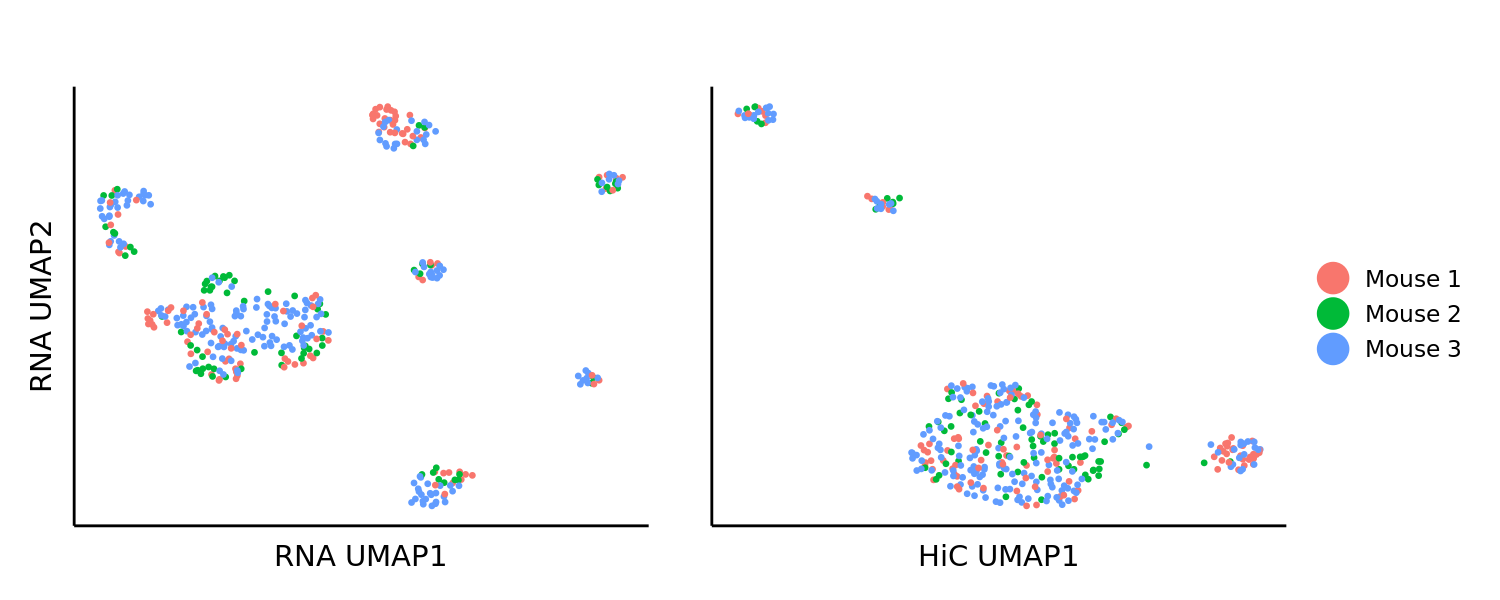

In [8]:
options(repr.plot.width = 5,repr.plot.height=2,repr.plot.res=300)
d <- DimPlot(hires,group.by = "mouse_id",pt.size=0.1)  + 
    theme_Publication() + NoLegend() + ggtitle("") + 
    xlab("RNA UMAP1") + ylab("RNA UMAP2")+ theme(axis.ticks.x = element_blank(),
        axis.text.x = element_blank(),
         axis.ticks.y = element_blank(),
          axis.text.y = element_blank())
e <- DimPlot(hires,group.by = "mouse_id",pt.size=0.1,reduction = "schiclusterumap")   +
    theme_Publication() + ggtitle("") + theme(legend.position = "right",legend.direction = "vertical")+ 
    xlab("HiC UMAP1") + ylab("")+theme(axis.ticks.x = element_blank(),
        axis.text.x = element_blank(),
         axis.ticks.y = element_blank(),
          axis.text.y = element_blank())
d|e

In [9]:
(a|b|c) %>% ggsave(filename = "batchstat.pdf",height = 1.5,width = 4.5,dpi = 300, units = "in")

In [10]:
(d|e) %>% ggsave(filename = "batchumap.pdf",height = 1.5,width = 3.5,dpi = 300, units = "in")

In [11]:
# heatmap

In [12]:
Idents(hires) <-hires[[]] %>% select(celltype)
DefaultAssay(hires) <- "SCT"
all.markers <- FindAllMarkers(hires,only.pos = TRUE)
heatmap_markers <- all.markers %>% group_by(cluster) %>% slice(1:100)

cluster_info<-sort(factor(hires$celltype,levels = c("Ex1","Ex2","Ex3","In1","In2","Ast","Oli")))

heatmap_markers$cluster <- factor(heatmap_markers$cluster,levels = c("Ex1","Ex2","Ex3","In1","In2","Ast","Oli"))
heatmap_markers<- heatmap_markers %>% arrange(cluster)

conections <- hires[[]] %>% select(seurat_clusters,celltype) %>% rownames_to_column("cellname") %>% select(-cellname) #%>% unique() %>% arrange(seurat_clusters)
conections$celltype <- factor(conections$celltype,levels =c("Ex1","Ex2","Ex3","In1","In2","Ast","Oli"))
conections<- conections %>% arrange(celltype)

Calculating cluster Ex1

Calculating cluster Ex2

Calculating cluster In1

Calculating cluster Ast

Calculating cluster Oli

Calculating cluster In2

Calculating cluster Ex3



In [13]:
top_markers <- heatmap_markers %>% filter(!str_detect(gene,"^Gm|^Hs|Rik$"))%>% group_by(cluster) %>% slice(1)  %>% pull(gene)

In [14]:
cols = c("Oli"="#d15656","Ast"="#e0a727","Ex1"="#045a8d","Ex2"="#3690c0","Ex3"="#a6bcdb","In1"="#7ebb41","In2"="#1b7837")

In [15]:
#getdata
mat <- GetAssayData(hires, slot = "scale.data",assay = "SCT") %>% as.matrix()
mat <- mat[intersect(heatmap_markers$gene,rownames(mat)), names(cluster_info)]

#plot heatmap
top_anno <- HeatmapAnnotation(
  cluster = anno_block(gp = gpar(fill = col), # 设置填充色
                       labels = levels(cluster_info), 
                       labels_gp = gpar(cex = 0.5, col = "white"))) # 设置字体
#mark_gene <- c("Neurod2","Gad2","Mbp","Slc1a3","Meis2","Foxp2","Cux2","Tle4","Rorb","Rgs9","Cx3cr1","Npy2r")
mark_gene <- c("Meg3","Rbfox3","Mbp","Slc1a3","Neurod2","Gad2","Rorb","Tshz2","Tle4","Meis2","Pvalb","Vip","Ndnf","Sst","Dlx1")
mark_gene <- c(mark_gene,top_markers)
gene_pos <- which(rownames(mat) %in% mark_gene)

row_anno <-  rowAnnotation(mark_gene = anno_mark(at = gene_pos, labels = rownames(mat) %>% intersect(mark_gene)),show_annotation_name="right")
col_anno = columnAnnotation(df = conections %>% select(celltype), col = list(celltype=cols),show_legend = F,
                  show_annotation_name = F)

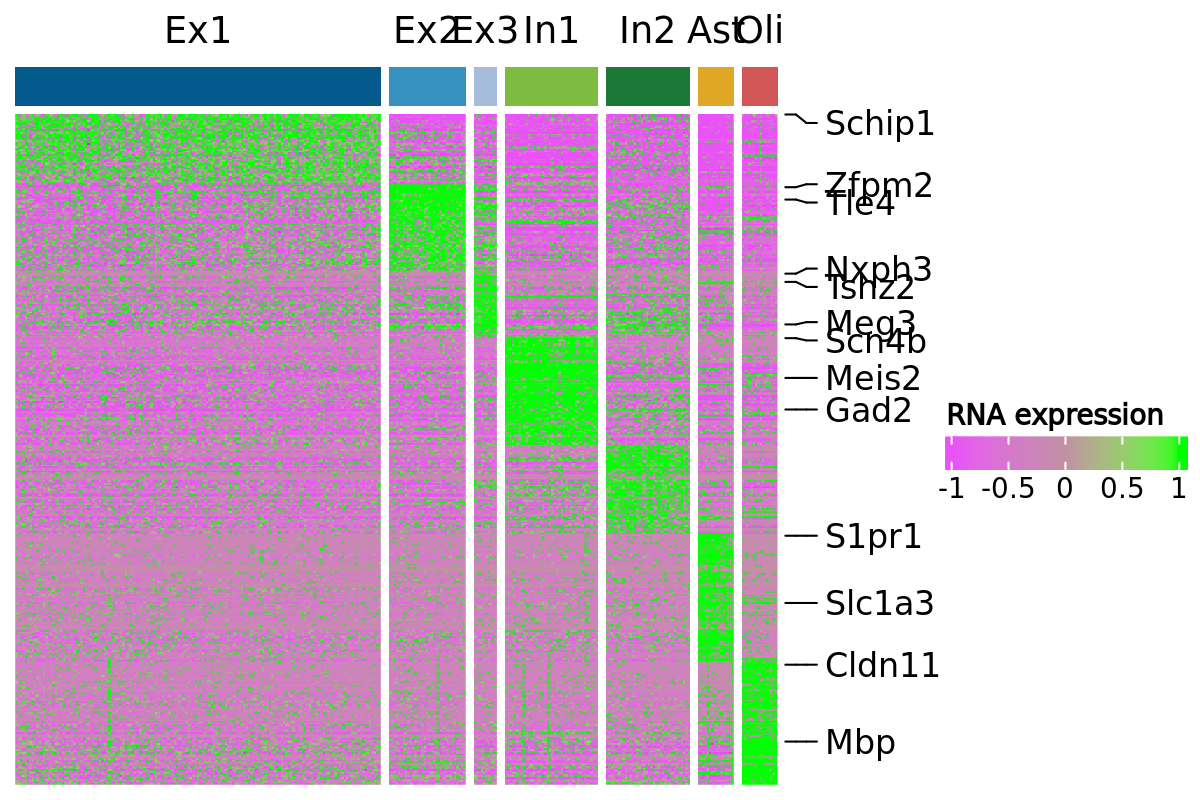

In [43]:
# col_fun <- colorRamp2(
#   c(-1,1, 2.5), 
#   c("#451b58","#218c8d", "#fae93e")
#   )

col_fun = colorRamp2(seq(-1,1,length.out = 3), rev(c("#00FF00","#c091a3","#e952f8")))
options(repr.plot.width = 6,repr.plot.height=4,repr.plot.res=200)
a <- Heatmap(mat,
        col = col_fun,
        cluster_rows = FALSE,
        cluster_columns = FALSE,
        show_column_names = FALSE,
        show_row_names = FALSE,
        right_annotation = row_anno,
        top_annotation= col_anno,
         column_split = cluster_info,
             heatmap_legend_param = list(title = "RNA expression",direction = "horizontal"),
             show_heatmap_legend = TRUE,
                  use_raster=TRUE)
a

Warning message:
“`read_table2()` was deprecated in readr 2.0.0.
Please use `read_table()` instead.”

── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  chr = col_character(),
  start = col_double(),
  end = col_double(),
  id = col_character(),
  name = col_character(),
  strand = col_character()
)

Joining, by = c("chr", "bin")


name,ValaB8w3001,ValaB8w3002,ValaB8w3003,ValaB8w3004,ValaB8w3005,ValaB8w3006,ValaB8w3007,ValaB8w3008,ValaB8w3009,⋯,ValbB8w1183,ValbB8w1184,ValbB8w1185,ValbB8w1186,ValbB8w1187,ValbB8w1188,ValbB8w1189,ValbB8w1190,ValbB8w1191,ValbB8w1192
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0610005C13Rik,0.7641705,0.9259412,0.5403393,0.8117501,0.8911874,0.9271825,0.7757551,0.8349193,0.6814233,⋯,0.9635912,0.8407116,0.6152255,0.9275962,0.9007034,0.7058337,0.7811336,0.8448490,0.8551924,0.8415391
0610006L08Rik,0.2618949,0.5469590,0.3694663,0.5370294,0.4327679,0.6776996,0.7463798,0.5436492,0.4050476,⋯,0.8038891,0.7236243,0.4778651,0.3901531,0.4484899,0.5146876,0.1493587,0.5908151,0.4815887,0.3764998
0610009B22Rik,0.7277617,0.9937940,0.9366984,0.9445594,0.9735209,0.9106330,0.9172528,0.9027720,0.7931320,⋯,0.9507654,0.7314853,0.9722797,0.9395945,0.9069094,0.9429044,0.9412495,0.9155978,0.6363260,0.6640463
0610009E02Rik,0.9027720,0.8771204,0.7004551,0.9081506,0.8630534,0.6408771,0.9309061,0.8874638,0.7960281,⋯,0.6793546,0.9218039,0.8907737,0.6611502,0.9118742,0.7546545,0.9350434,0.9371121,0.9333885,0.8556061
0610009L18Rik,0.9925528,0.9991725,0.9747621,0.9937940,0.9780720,0.9892429,0.9611088,0.9735209,0.9888291,⋯,0.9809681,0.9942077,0.9718659,0.9975176,0.9987588,0.9962764,0.9950352,0.9780720,0.9983451,0.9433182
0610010F05Rik,0.5134464,0.6239139,0.5142739,0.4613157,0.3115432,0.4654530,0.4464212,0.5887464,0.1874224,⋯,0.3251965,0.5184113,0.1683906,0.4662805,0.7918908,0.3822921,0.3090608,0.5788167,0.1373604,0.3177493


Warning message:
“The following features are not present in the object: Rtl4, Cnksr2, Trpc5, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: Frmpd4, Glra2, Nhsl2, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: Pde1b, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: Tspan7, Phka1, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: Plxnb3, Plp1, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: Nhs, Arhgef6, 5330434G04Rik, Fgf13, Tenm1, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: Frmpd4, Htr2c, not searching for symbol synonyms”
Warning message:
“The input is a data frame, convert it to a matrix.”


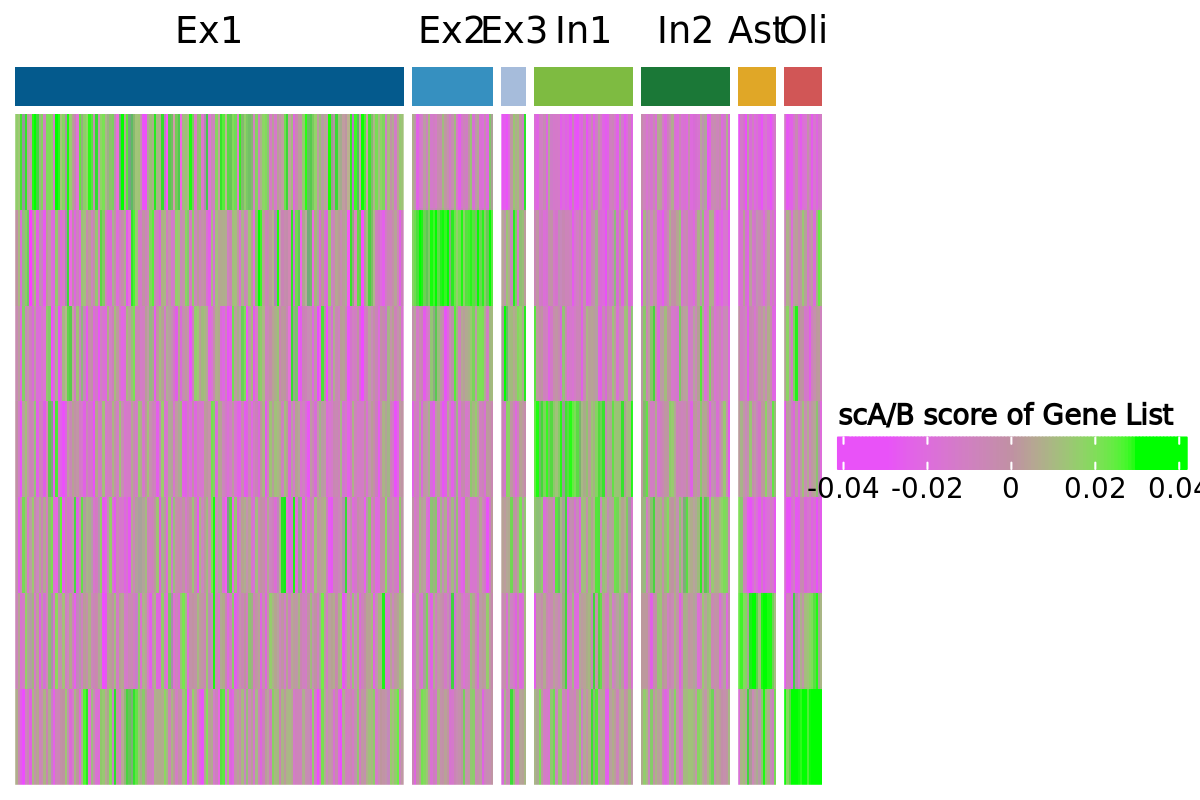

In [42]:
# convert scab to scabgene
chrList <- paste0("chr",seq(1:19))
genes <- read_table2("~/share/Data/public/ref_genome/mouse_ref/M23/raw_data/gene.bed",col_names = c("chr","start","end","id","name","strand")) %>% group_by(name) %>% slice(1)
geneNormCpG <- hires[["scab"]]@data %>% as.data.frame() %>% rownames_to_column("bin") %>% separate(bin,into = c("chr","bin"),sep = "-") %>% mutate(bin=as.numeric(bin))
genes_cpg_data<-genes %>% mutate(bin = floor(((start+end)/2+500000)/1000000)*1000000) %>% left_join(geneNormCpG) %>% na.omit() %>% select(-start,-end,-chr,-id,-strand,-bin) #%>% mutate(name=paste0("cpg_",name))
head(genes_cpg_data)
genes_cpg_assay <- CreateAssayObject(genes_cpg_data %>% column_to_rownames("name"))
hires[["cpggene"]] <- genes_cpg_assay

top100.markers <- top_n(all.markers%>% group_by(cluster),100,wt=avg_log2FC)
top100.markers.list <- top100.markers %>% select(cluster,gene) %>% mutate(num = row_number()) %>% spread(key=cluster,value = gene) %>% select(-num) %>% as.list()
DefaultAssay(hires) <- "cpggene"
clusters <- hires[[]] %>% pull(celltype) %>% unique
for(i in 1:length(clusters)){
    hires <- AddModuleScore(hires,features = list(top100.markers.list[clusters[i]][[1]]),assay = "cpggene",name = paste0("cluster",clusters[i],"_"))
}

mat_cpg <- hires[[]] %>% select(starts_with("cluster"))# %>% column_to_rownames("cellname")# %>% t()
mat_cpg <- (mat_cpg %>% t()) %>% as.data.frame() %>% rownames_to_column("temp") %>% rowwise%>% mutate(temp = str_split(temp,pattern = "_")[[1]][1]) %>% ungroup()
mat_cpg$temp <- factor(mat_cpg$temp,levels=paste0("cluster",c("Ex1","Ex2","Ex3","In1","In2","Ast","Oli")))
mat_cpg <- mat_cpg %>% arrange(temp) %>% column_to_rownames("temp")

options(repr.plot.width = 6,repr.plot.height=4,repr.plot.res=200)
# col_fun <- colorRamp2(
#   c(-0.04,0.0,0.04),
#    # c("#e516ea","#7f7e80", "#08f208"),
#   c("#451b58","#218c8d", "#fae93e")
  #)
col_fun = colorRamp2(seq(-0.03,0.03,length.out = 3), rev(c("#00FF00","#c091a3","#e952f8")))
b<-Heatmap(mat_cpg[,names(cluster_info)],
        col = col_fun,
        cluster_rows = FALSE,
        cluster_columns = FALSE,
        show_column_names = FALSE,
        show_row_names = FALSE,
        #right_annotation = row_anno,
        top_annotation= col_anno,
        heatmap_legend_param = list(title = "scA/B score of Gene List",direction = "horizontal"),
        column_split = cluster_info,
           show_heatmap_legend = TRUE,
                  use_raster=TRUE)
b

In [46]:
pdf("RNA_heatmap.pdf", width = 5, height = 3,fonts = "Helvetica") 
draw(a,heatmap_legend_side = "bottom")
dev.off() 

pdf("CpG_heatmap.pdf", width = 5, height = 3,fonts = "Helvetica") 
draw(b,heatmap_legend_side = "bottom")
dev.off() 

png 
  2

png 
  2

# Radial position

In [12]:
cellnames_qcpass <- hires[[]]  %>% filter(`20k` < 1.5) %>% pull(cellname)

In [116]:
color_paths <- paste0("/shareb/zliu/analysis/hires_validation/Data_combine/3d_info/rp/",cellnames_qcpass,".20k.rp.gz")
parseRadPos <- function(filename){
    temp <- read_table(filename,col_types = cols(),col_names = c("chr","bin","pos")) %>% mutate(cellname = str_extract(filename,"[GOV][A-Za-z0-9]+"))
    return(temp)
}
res <- map(color_paths,parseRadPos) %>% bind_rows()
res <- res %>% group_by(cellname) %>% mutate(pos_norm = pos/mean(pos))
data <- res %>% left_join(hires[[]] %>% select(cellname,celltype)) %>% group_by(celltype,chr,bin) %>% summarise(mean_pos = mean(pos_norm))

# exclude chrom XY 
all <- data %>% mutate(chrom = str_extract(chr,pattern = "chr[0-9XY]+")) #%>% group_by(celltype,chrom,bin) %>% summarise(mean_pos = mean(mean_pos)) %>% na.omit()
all$chrom <- factor(all$chrom, levels = paste0("chr",c(seq(1:19),"X","Y")))

Joining, by = "cellname"
`summarise()` has grouped output by 'celltype', 'chr'. You can override using the `.groups` argument.


In [117]:
hires_rp <- all

In [118]:
hires_rp %>% filter(!celltype%in% c("Ast","Oli")) %>% group_by(chrom,bin) %>% summarise(mean_pos = mean(mean_pos)) %>% mutate(method = "HiRES") -> hires_rp

`summarise()` has grouped output by 'chrom'. You can override using the `.groups` argument.


In [119]:
files <- dir("/shareb/zliu/analysis/hires_validation/Tan2021/HiC/radialpos/20k/")
Tancolor_paths <- paste0("/shareb/zliu/analysis/hires_validation/Tan2021/HiC/radialpos/20k/",files[str_detect(files,"bc")])
res <- map(Tancolor_paths,parseRadPos) %>% bind_rows()
res <- res %>% group_by(cellname) %>% mutate(pos_norm = pos/mean(pos))
data <- res %>% mutate(celltype = "neuron") %>% group_by(celltype,chr,bin) %>% summarise(mean_pos = mean(pos_norm))

# exclude chrom XY 
all <- data %>% mutate(chrom = str_extract(chr,pattern = "chr[0-9XY]+")) #%>% group_by(celltype,chrom,bin) %>% summarise(mean_pos = mean(mean_pos)) %>% na.omit()
all$chrom <- factor(all$chrom, levels = paste0("chr",c(seq(1:19),"X","Y")))
dipc_rp <- all

`summarise()` has grouped output by 'celltype', 'chr'. You can override using the `.groups` argument.


In [120]:
dipc_rp %>% group_by(chrom,bin) %>% summarise(mean_pos = mean(mean_pos)) -> dipc_rp

`summarise()` has grouped output by 'chrom'. You can override using the `.groups` argument.


In [121]:
dipc_rp  %>% mutate(method = "Dip-C") -> dipc_rp

In [122]:
plot_rp_data <- rbind(dipc_rp,hires_rp)

In [163]:
options(repr.plot.width=10, repr.plot.height=3,repr.plot.res=200)
set.seed(42)
p <- plot_rp_data %>% arrange(chrom,bin)%>% group_by(method)%>% mutate(rank = row_number()) %>% filter((rank %% 10) == 1) %>% 
    filter(chrom != "chrY",chrom != "chrX")%>% ggscatter(x="bin",y="mean_pos",color= "method",size = 0.1) + 
    facet_grid(~chrom,scales = "free_x",space = "free") + 
    scale_y_continuous(limits = c(0.5,1.4)) + scale_x_continuous(n.breaks = 2) +theme(legend.position = "right",legend.direction = "vertical")
p <- p + xlab("") + ylab("Normalized radial position")

Warning message:
“Removed 4 rows containing missing values (geom_point).”


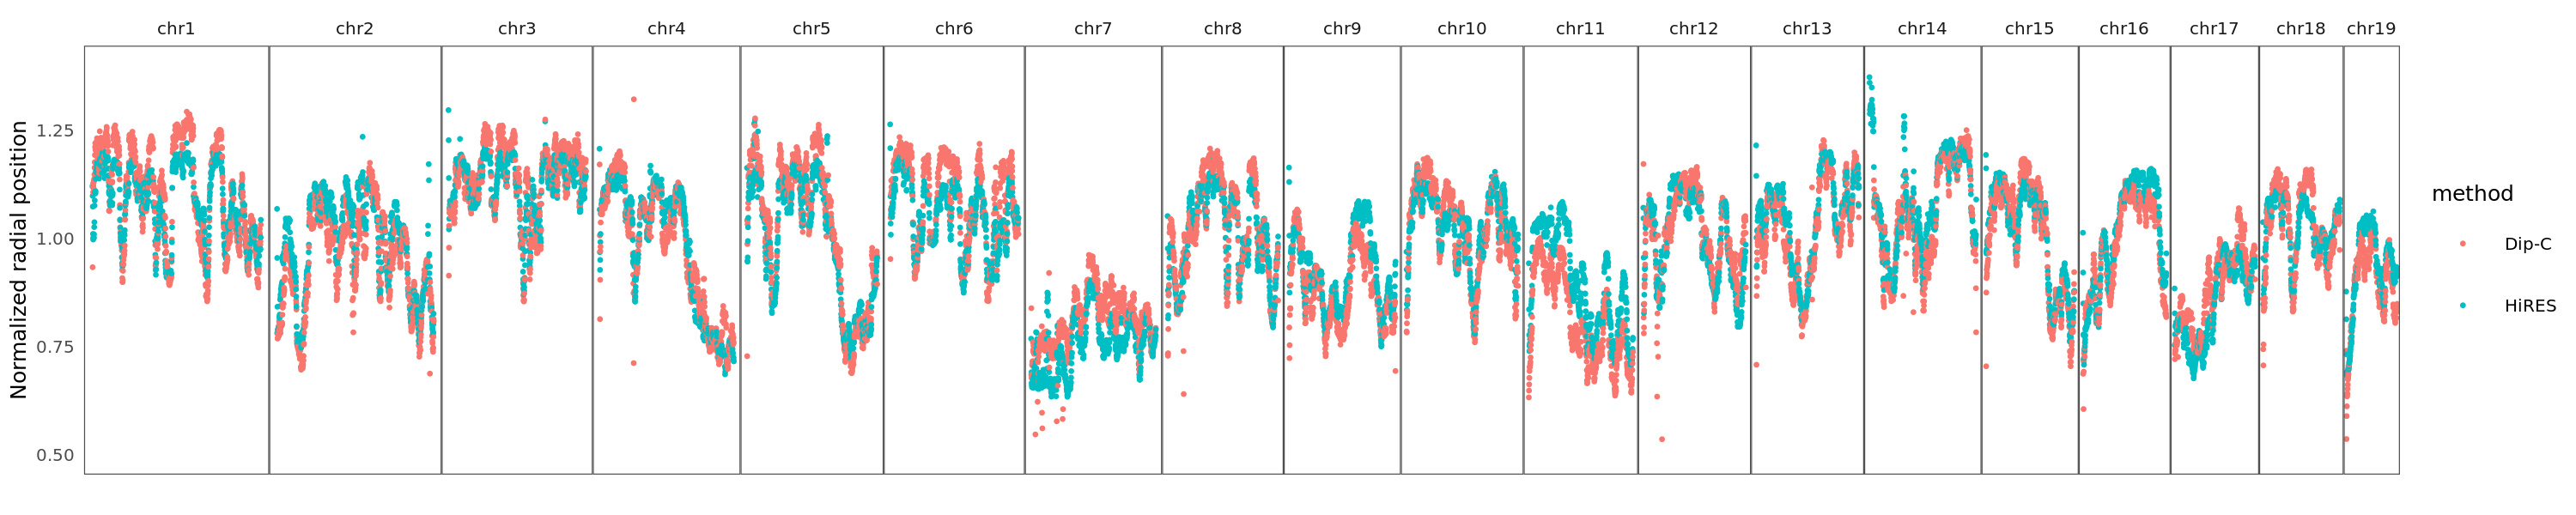

In [164]:
options(repr.plot.width=10, repr.plot.height=2,repr.plot.res=300)
p + xlab("") + theme_few(base_size=6) + theme( panel.spacing = unit(0,'lines'),axis.ticks = element_blank(),axis.text.x = element_blank()) 

In [165]:
p <- p + xlab("") + theme_few(base_size=6) + theme( panel.spacing = unit(0,'lines'),axis.ticks = element_blank(),axis.text.x = element_blank()) 

In [166]:
p  %>% ggsave(filename = "radialpositon.pdf",dpi = 300,height = 1.5,width = 8)

Warning message:
“Removed 4 rows containing missing values (geom_point).”


In [ ]:
# PIE CHART

In [81]:
hires[[]] %>% select(UMIs_gene,UMIs_exon) %>% colSums

UMIs_gene UMIs_exon 
 11518119   2963228

In [82]:
2963228 / 11518119

[1] 0.2572667

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


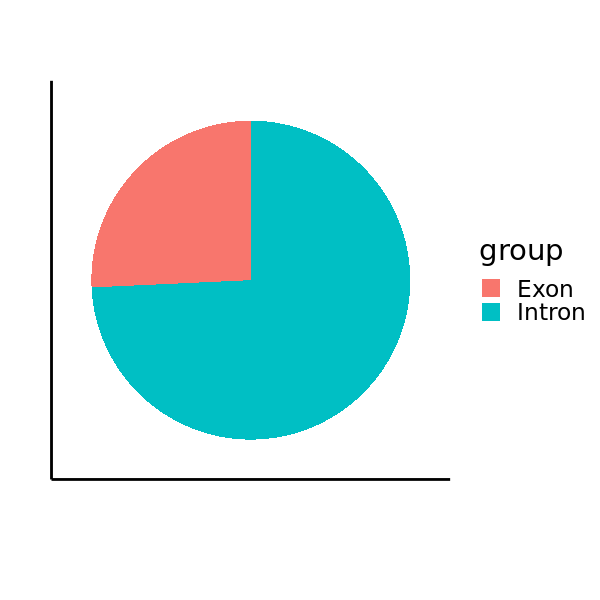

In [101]:
options(repr.plot.width=2, repr.plot.height=2,repr.plot.res=300)

data <- data.frame(
  group=c("Exon","Intron"),
  value=c(2963228,11518119 - 2963228)
)

# Basic piechart
p <- ggplot(data, aes(x="", y=value, fill=group)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0) +  theme_Publication()  + theme(axis.ticks = element_blank(),axis.text = element_blank()) + 
    xlab("") + ylab("") + 
    theme(legend.position = "right",legend.direction = "vertical")
p
p  %>% ggsave(filename = "RNA_annotate.pdf",dpi = 300,height = 1.5,width = 1.7)

In [ ]:
#S3B  please refer /shareb/zliu/analysis/hires_validation/scAB_difference_geneexp/1_process.ipynb